In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading datasets

In [187]:
fitbit_daily_activity_df = pd.read_csv('../../../../data/public_data/cleaned/fitbit/cleaned_daily_activity.csv')
fitbit_daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [188]:
# (Leaving out sleep data for now - could perhaps use minutes sleep data - combine it into day (so we have 2 months worth), but need to think how to combine so you get full night sleep not full minutes asleep a day which is kinda misleading??? Maybe)
# fitbit_sleep_df = pd.read_csv('../../data/public_data/cleaned/fitbit/cleaned_minute_sleep.csv')
# fitbit_sleep_df.head()

# Convert ActivityDate column to DateTime data type

In [189]:
fitbit_daily_activity_df['ActivityDate'].dtype

dtype('O')

In [190]:
fitbit_daily_activity_df['ActivityDate'] = pd.to_datetime(fitbit_daily_activity_df['ActivityDate'])
fitbit_daily_activity_df['ActivityDate'].dtype

dtype('<M8[ns]')

In [191]:
fitbit_daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [192]:
fitbit_daily_activity_df = fitbit_daily_activity_df.drop(columns=['Id', 'ActivityDate']) # ignoring the Id and Date for now...
len(fitbit_daily_activity_df)

1234

In [193]:
fitbit_daily_activity_df.describe()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,8121.300648,5.820567,5.790413,0.143076,1.572326,0.607561,3.602877,0.001929,22.109400,15.136143,209.283630,951.935981,2345.077796
std,4897.590725,3.816192,3.804229,0.732379,2.720970,0.899906,1.900541,0.008205,32.817076,27.622838,98.967741,280.736579,719.893006
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000
25%,4507.500000,3.100000,3.050000,0.000000,0.000000,0.000000,2.252500,0.000000,0.000000,0.000000,145.000000,721.000000,1850.250000
50%,7748.000000,5.440000,5.430000,0.000000,0.330000,0.280000,3.565000,0.000000,6.000000,8.000000,209.500000,1003.500000,2204.500000
75%,11036.250000,7.837500,7.827500,0.000000,2.140000,0.840000,4.880000,0.000000,33.000000,21.000000,272.000000,1185.000000,2811.750000
max,36019.000000,28.030001,28.030001,6.727057,21.920000,6.480000,12.510000,0.110000,210.000000,660.000000,720.000000,1439.000000,4900.000000


# Feature Engineering to combine activity minutes

In [194]:
# using the ActivityMinutes scale: 1=light, 2=moderate, 3=very active. Combine the minutes by their scale to get a total combination of activity minutes.
fitbit_daily_activity_df['TotalActivityMinutes'] = (fitbit_daily_activity_df['LightlyActiveMinutes']) + (fitbit_daily_activity_df['FairlyActiveMinutes'] * 2) + (fitbit_daily_activity_df['VeryActiveMinutes'] * 3)

In [196]:
fitbit_daily_activity_df['TotalActivityMinutes'].describe()

count    1234.000000
mean      305.884117
std       156.455571
min         0.000000
25%       196.000000
50%       309.000000
75%       406.750000
max      1320.000000
Name: TotalActivityMinutes, dtype: float64

# Focusing on Intesity Minutes and Total Steps only for now

In [184]:
activity_steps_df = fitbit_daily_activity_df[['TotalSteps', 'TotalActivityMinutes']]

In [185]:
activity_steps_df.head()

,TotalSteps,TotalActivityMinutes
0,11004,328
1,17609,575
2,12736,446
3,13231,381
4,12041,383


# Feature Scaling and Transformation

/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_62130/3582164216.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  activity_steps_df.hist(ax=axis, bins=20)


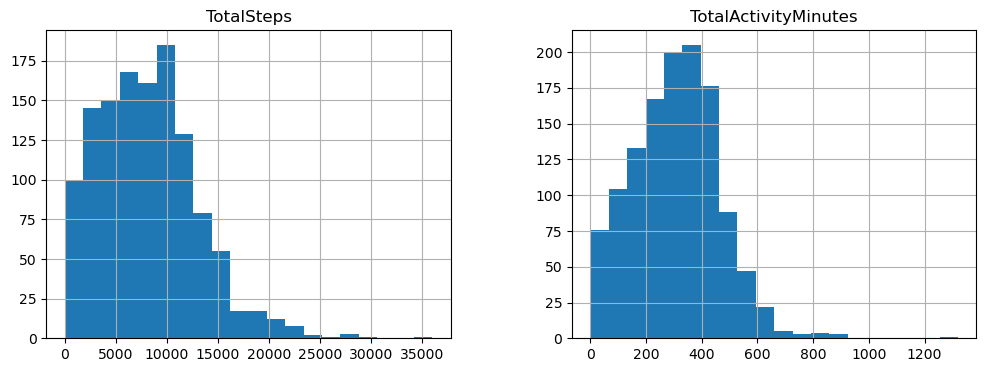

In [146]:
# inspecting the distribution of each feature:
fig, axis = plt.subplots(figsize=(12, 4))
activity_steps_df.hist(ax=axis, bins=20)
plt.show()

In [147]:
activity_steps_df.skew()

TotalSteps              0.779597
TotalActivityMinutes    0.447907
dtype: float64

In [148]:
before_unskewed_df = activity_steps_df.copy() #(for comparison after)

In [149]:
def box_cox_transformation(feature, l):
    transform = ColumnTransformer(transformers=[("box-cox", FunctionTransformer(lambda X: stats.boxcox(X, lmbda=l)), [feature])])
    # return pd.DataFrame(transform.fit_transform(activity_steps_df))
    return transform.fit_transform(activity_steps_df)

In [150]:
activity_steps_df['TotalSteps'] = box_cox_transformation(feature="TotalSteps", l=0.65)
activity_steps_df['TotalActivityMinutes'] = box_cox_transformation(feature="TotalActivityMinutes", l=0.8)

/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_62130/676457165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_steps_df['TotalSteps'] = box_cox_transformation(feature="TotalSteps", l=0.65)
/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_62130/676457165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_steps_df['TotalActivityMinutes'] = box_cox_transformation(feature="TotalActivityMinutes", l=0.8)


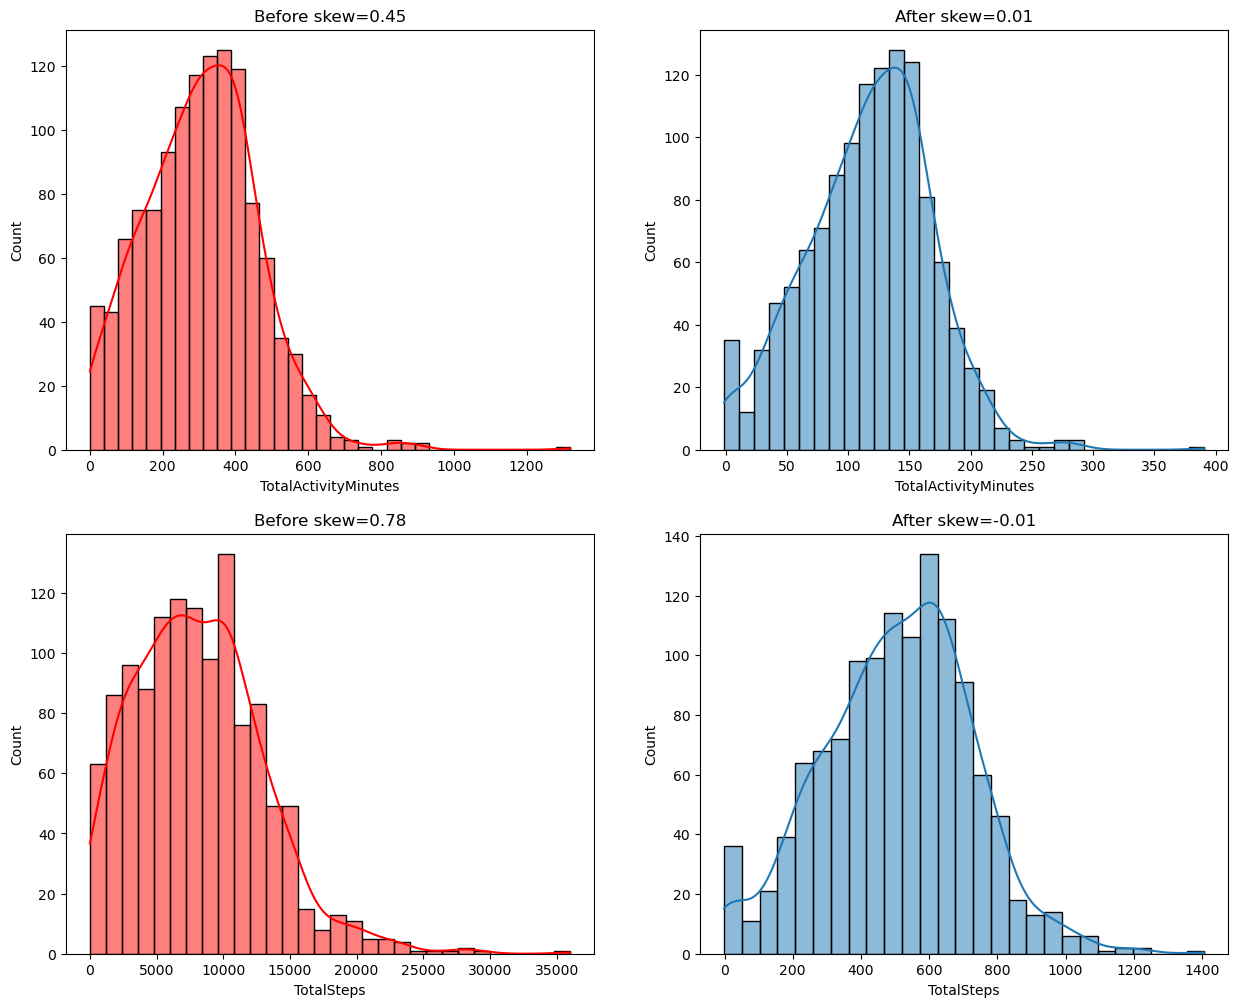

In [151]:

fig, ax = plt.subplots(2, 2, figsize=(15,12))
# activity_steps_df.hist(ax=ax, bins=20)
sns.histplot(before_unskewed_df['TotalActivityMinutes'], kde=True, ax=ax[0,0], color='red').set(title=f"Before skew={before_unskewed_df['TotalActivityMinutes'].skew():0.2f}")
sns.histplot(activity_steps_df['TotalActivityMinutes'], kde=True, ax=ax[0,1]).set(title=f"After skew={activity_steps_df['TotalActivityMinutes'].skew():0.2f}")

sns.histplot(before_unskewed_df['TotalSteps'], kde=True, ax=ax[1,0], color='red').set(title=f"Before skew={before_unskewed_df['TotalSteps'].skew():0.2f}")
sns.histplot(activity_steps_df['TotalSteps'], kde=True, ax=ax[1,1]).set(title=f"After skew={activity_steps_df['TotalSteps'].skew():0.2f}")

plt.show()

In [152]:
activity_steps_df.describe()

,TotalSteps,TotalActivityMinutes
count,1234.000000,1234.000000
mean,507.578976,117.475172
std,218.141764,51.096951
min,-1.538462,-1.250000
25%,363.337166,84.004021
50%,517.332935,121.459107
75%,651.472749,151.637515
max,1407.205984,390.825006


# Scaling the features

In [153]:
#^ since the scales are different it's worth scaling the values to be of the same scales, so steps isn't given more weight than activity minutes

In [154]:
scaler = StandardScaler()
scaled_activity_steps = scaler.fit_transform(activity_steps_df)
scaled_activity_steps

array([[ 0.65421049,  0.19547012],
       [ 1.72260393,  1.62396863],
       [ 0.95213741,  0.89777839],
       ...,
       [ 0.60615396,  0.02185493],
       [ 2.27363777,  1.21192936],
       [ 0.10737306, -0.57405169]])

In [155]:
scaled_activity_steps_df = pd.DataFrame(scaled_activity_steps, columns=activity_steps_df.columns)
scaled_activity_steps_df

,TotalSteps,TotalActivityMinutes
0,0.654210,0.195470
1,1.722604,1.623969
2,0.952137,0.897778
3,1.034621,0.516268
4,0.834406,0.528191
...,...,...
1229,0.597776,0.046849
1230,2.104990,1.058622
1231,0.606154,0.021855
1232,2.273638,1.211929


In [156]:
scaled_activity_steps_df.describe()

,TotalSteps,TotalActivityMinutes
count,1234.000000,1.234000e+03
mean,0.000000,9.212872e-17
std,1.000405,1.000405e+00
min,-2.334830,-2.324470e+00
25%,-0.661498,-6.553174e-01
50%,0.044732,7.799978e-02
75%,0.659902,6.688500e-01
max,4.125720,5.351800e+00


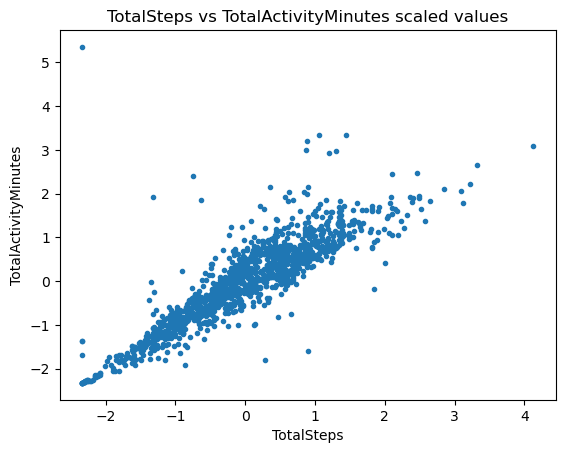

In [157]:
plt.plot(scaled_activity_steps_df['TotalSteps'].values, scaled_activity_steps_df['TotalActivityMinutes'].values, '.')
plt.xlabel('TotalSteps')
plt.ylabel('TotalActivityMinutes')
plt.title('TotalSteps vs TotalActivityMinutes scaled values')
plt.show()

In [158]:
#^^^ perhaps remove that outlier in the top left??

# K-means clustering

In [159]:

#! number of clusters?
kmeans_labels = KMeans(n_clusters=5, random_state=0).fit_predict(scaled_activity_steps_df.values)
# kmeans.labels_

In [160]:
kmeans_labels

array([1, 4, 1, ..., 1, 4, 3], dtype=int32)

In [161]:
scaled_activity_steps_df.describe()

,TotalSteps,TotalActivityMinutes
count,1234.000000,1.234000e+03
mean,0.000000,9.212872e-17
std,1.000405,1.000405e+00
min,-2.334830,-2.324470e+00
25%,-0.661498,-6.553174e-01
50%,0.044732,7.799978e-02
75%,0.659902,6.688500e-01
max,4.125720,5.351800e+00


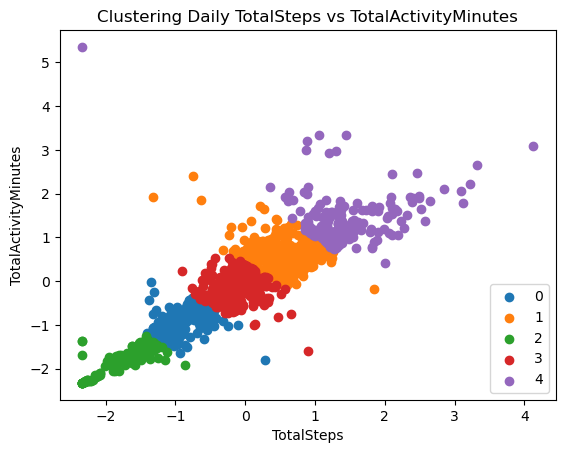

In [162]:
#Getting unique labels
 
u_labels = np.unique(kmeans_labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(scaled_activity_steps_df[kmeans_labels == i]['TotalSteps'], scaled_activity_steps_df[kmeans_labels == i]['TotalActivityMinutes'] , label = i)
plt.legend()

plt.title("Clustering Daily TotalSteps vs TotalActivityMinutes")
plt.xlabel('TotalSteps')
plt.ylabel('TotalActivityMinutes')
plt.show()

In [163]:
# can then use this model to predict which cluster a user's daily data would fit into, and perhaps get the average group over a week?